In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../datasets/SolarPrediction2.csv", parse_dates=['datetime'], index_col = ['datetime'])
df = df.sort_values(by="datetime", ascending=True)
df

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
datetime,,,,,,
2016-09-01 00:00:08,2.58,51,30.43,103,77.27,11.25
2016-09-01 00:05:10,2.83,51,30.43,103,153.44,9.00
2016-09-01 00:20:06,2.16,51,30.43,103,142.04,7.87
2016-09-01 00:25:05,2.21,51,30.43,103,144.12,18.00
2016-09-01 00:30:09,2.25,51,30.43,103,67.42,11.25
...,...,...,...,...,...,...
2016-12-31 23:35:02,1.22,41,30.34,83,238.94,6.75
2016-12-31 23:40:01,1.21,41,30.34,82,236.79,5.62
2016-12-31 23:45:04,1.21,42,30.34,81,218.28,7.87


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df.to_numpy())
df = pd.DataFrame(df, columns=[
  'Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed'])
df

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,-0.647475,-0.016651,0.130250,1.076717,-0.796235,1.434249
1,-0.646683,-0.016651,0.130250,1.076717,0.119642,0.789627
2,-0.648804,-0.016651,0.130250,1.076717,-0.017433,0.465884
3,-0.648646,-0.016651,0.130250,1.076717,0.007577,3.368113
4,-0.648519,-0.016651,0.130250,1.076717,-0.914672,1.434249
...,...,...,...,...,...,...
32681,-0.651780,-1.629278,-1.515921,0.307185,1.147704,0.145006
32682,-0.651811,-1.629278,-1.515921,0.268709,1.121852,-0.178738
32683,-0.651811,-1.468015,-1.515921,0.230232,0.899285,0.465884
32684,-0.651875,-1.629278,-1.515921,0.191756,0.862612,0.465884


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()

In [6]:
X = df[["Temperature", "Pressure", "Humidity", "WindDirection(Degrees)", "Speed"]]
X

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,-0.016651,0.130250,1.076717,-0.796235,1.434249
1,-0.016651,0.130250,1.076717,0.119642,0.789627
2,-0.016651,0.130250,1.076717,-0.017433,0.465884
3,-0.016651,0.130250,1.076717,0.007577,3.368113
4,-0.016651,0.130250,1.076717,-0.914672,1.434249
...,...,...,...,...,...
32681,-1.629278,-1.515921,0.307185,1.147704,0.145006
32682,-1.629278,-1.515921,0.268709,1.121852,-0.178738
32683,-1.468015,-1.515921,0.230232,0.899285,0.465884
32684,-1.629278,-1.515921,0.191756,0.862612,0.465884


In [7]:
y = df[["Radiation"]]
y

,Radiation
0,-0.647475
1,-0.646683
2,-0.648804
3,-0.648646
4,-0.648519
...,...
32681,-0.651780
32682,-0.651811
32683,-0.651811
32684,-0.651875


In [8]:
X_np = df[["Radiation","Temperature", "Pressure", "Humidity", "WindDirection(Degrees)", "Speed"]].to_numpy()
X_np

array([[-0.64747457, -0.01665121,  0.1302504 ,  1.07671743, -0.79623451,
         1.43424875],
       [-0.64668321, -0.01665121,  0.1302504 ,  1.07671743,  0.11964207,
         0.78962722],
       [-0.64880405, -0.01665121,  0.1302504 ,  1.07671743, -0.01743281,
         0.46588396],
       ...,
       [-0.65181123, -1.4680154 , -1.51592086,  0.23023219,  0.89928546,
         0.46588396],
       [-0.65187453, -1.62927808, -1.51592086,  0.19175559,  0.86261192,
         0.46588396],
       [-0.65181123, -1.62927808, -1.51592086,  0.23023219,  0.86657988,
         0.78962722]])

In [9]:
WINDOW = 38
HORIZON = 1
X_train = []
y_train = []
for i in range(0, len(X_np)):
    X_train.append(X_np[0:WINDOW])
y_train = y[39:]
y_train

,Radiation
39,-0.646683
40,-0.648772
41,-0.648931
42,-0.649247
43,-0.650292
...,...
32681,-0.651780
32682,-0.651811
32683,-0.651811
32684,-0.651875


In [10]:
import numpy as np
y_train = np.array(y_train)

In [11]:
X_train = np.array(X_train)

In [12]:
X_train = X_train[:32647]
X_train.shape, y_train.shape

((32647, 38, 6), (32647, 1))

In [13]:
X_train.shape[1], X_train.shape[2]

(38, 6)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(200, activation='relu', input_shape =(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    tf.keras.layers.LSTM(150, activation='relu', return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(y_train.shape[1])
])

In [16]:
model.compile(optimizer='adam', loss = 'mse')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 38, 200)           165600    
                                                                 
 lstm_1 (LSTM)               (None, 150)               210600    
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 376,351
Trainable params: 376,351
Non-trainable params: 0
_________________________________________________________________


In [18]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10170140394394512127
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1673330688
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11605577473622392764
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]
Num GPUs Available:  1


In [19]:
results = model.fit(X_train, y_train, epochs = 30, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/30
653/653 [==============================] - 30s 43ms/step - loss: 1.1484 - val_loss: 0.7616
Epoch 2/30
653/653 [==============================] - 30s 46ms/step - loss: 1.1477 - val_loss: 0.7587
Epoch 3/30
653/653 [==============================] - 32s 49ms/step - loss: 1.1474 - val_loss: 0.7675
Epoch 4/30
653/653 [==============================] - 32s 49ms/step - loss: 1.1474 - val_loss: 0.7628
Epoch 5/30
653/653 [==============================] - 32s 50ms/step - loss: 1.1472 - val_loss: 0.7560
Epoch 6/30
653/653 [==============================] - 32s 49ms/step - loss: 1.1474 - val_loss: 0.7589
Epoch 7/30
653/653 [==============================] - 33s 50ms/step - loss: 1.1474 - val_loss: 0.7634
Epoch 8/30
653/653 [==============================] - 32s 50ms/step - loss: 1.1473 - val_loss: 0.7588
Epoch 9/30
653/653 [==============================] - 33s 50ms/step - loss: 1.1473 - val_loss: 0.7617
Epoch 10/30
653/653 [==============================] - 33s 51ms/step - loss: 1.147

In [20]:
model.save('gridnet.h5')

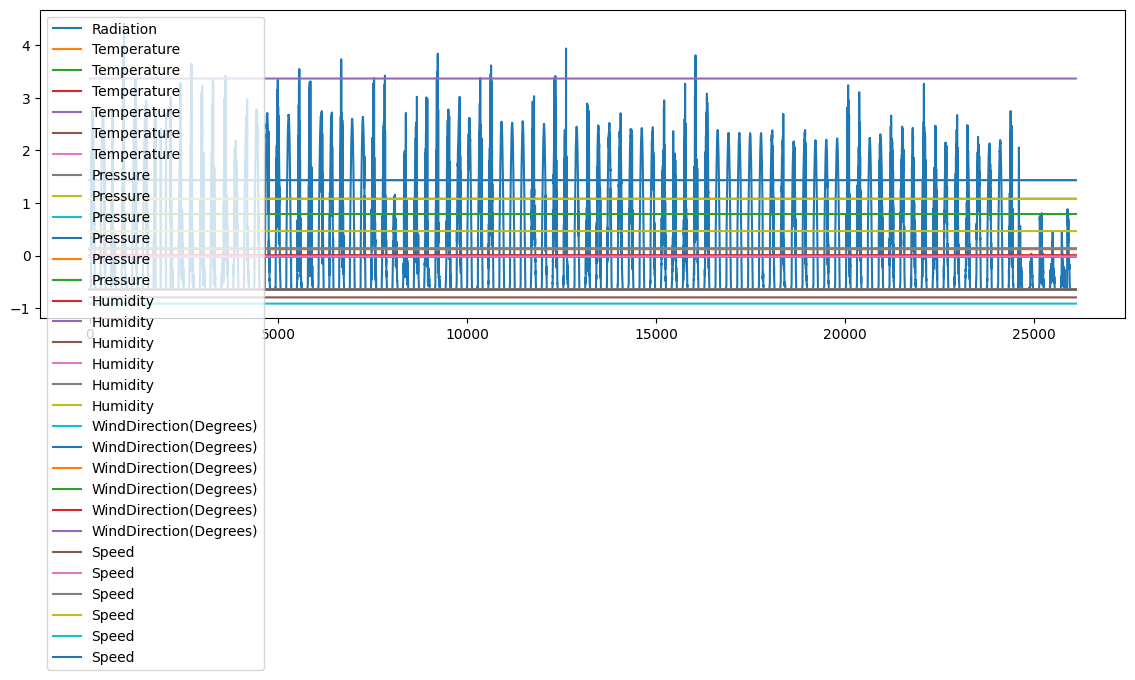

In [21]:
#plot X_train and y_train

plt.figure(figsize=(14, 4)) 
plt.plot(y_train, label='Radiation')
plt.plot(X_train[:,0], label='Temperature')
plt.plot(X_train[:,1], label='Pressure')
plt.plot(X_train[:,2], label='Humidity')
plt.plot(X_train[:,3], label='WindDirection(Degrees)')
plt.plot(X_train[:,4], label='Speed')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#ploy X_test and y_test

plt.figure(figsize=(14, 4)) 
plt.plot(y_test, label='Radiation')
plt.plot(X_test[:,0], label='Temperature')
plt.plot(X_test[:,1], label='Pressure')
plt.plot(X_test[:,2], label='Humidity')
plt.plot(X_test[:,3], label='WindDirection(Degrees)')
plt.plot(X_test[:,4], label='Speed')
plt.legend(loc='upper left')



205/205 [==============================] - 2s 7ms/step


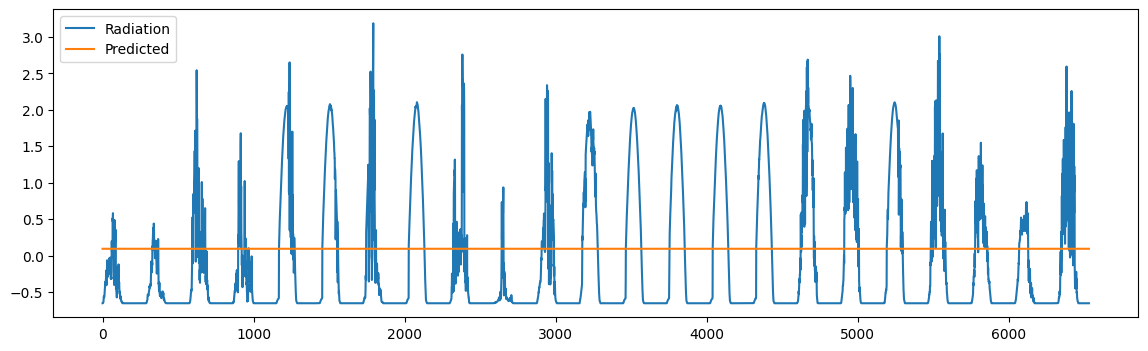

In [22]:
#plot X_test and Predicted values

plt.figure(figsize=(14, 4))
plt.plot(y_test, label='Radiation')
plt.plot(model.predict(X_test), label='Predicted')
plt.legend(loc='upper left')


In [23]:
y_test

array([[-0.65165295],
       [-0.65174792],
       [-0.65120979],
       ...,
       [-0.65181123],
       [-0.65187453],
       [-0.65181123]])

In [24]:
ypred = model.predict(X_test)

205/205 [==============================] - 1s 7ms/step


In [25]:
ypred

array([[0.09493566],
       [0.09493566],
       [0.09493566],
       ...,
       [0.09493566],
       [0.09493566],
       [0.09493566]], dtype=float32)

In [26]:
ypred - y_test

array([[0.74658862],
       [0.74668358],
       [0.74614545],
       ...,
       [0.74674689],
       [0.7468102 ],
       [0.74674689]])